In [ ]:
import zipfile
import os

# Specify the path to your zip file
zip_path = "s4_code_and_data.zip"
extract_to = "4"

# Ensure the extraction directory exists
os.makedirs(extract_to, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print(f"Extracted to: {extract_to}")


In [ ]:
# ## Mount google drive: If your dataset is saved on google drive
# from google.colab import drive
# drive.mount('/content/drive')

### Question 1 - Harris Detector

Eigenvalues of autocorrelation matrix C:

<img src="assets/harris_eigenvalue.png" alt="drawing" width="300"/>

When represents by response function we get:

<img src="assets/CMU-16-385-lecnote.png" alt="drawing" width="500"/>

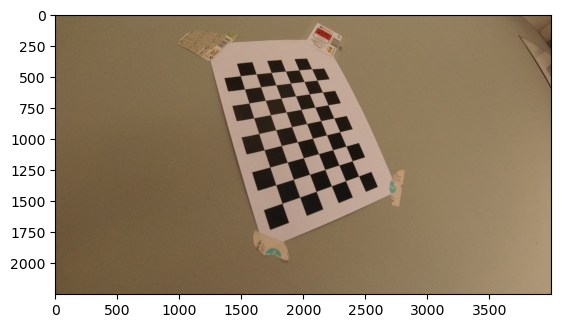

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Reading images (work with the checkboard.jpg or checkboard2.jpg first to verify your code)
# img1 = cv2.imread('./images/graf.png')
img1 = cv2.imread('./images/checkboard.jpg') # loaded in BGR
plt.imshow(img1[:,:,::-1]) # Plot should change to RGB

In [6]:
# Estimate the Harris keypoints and overlay them on the image
sigma1 = 2.6
sigma2 = 1.6

def gauss(x, sigma):
    #TODO: compute the gaussian(mean=0, sig=sigma) for x and put the results in "G" variable
    G = (1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-x**2 / (2 * sigma**2))
    return G

def gaussdx(x, sigma):
    D = -(x / (sigma**2)) * gauss(x, sigma) #TODO: compute the derivative of gaussian(mean=0, sig=sigma) for x and put the results in "D" variable
    return D

def compute_harris(img, sigma1, sigma2):
    if img.ndim == 3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = np.double(img)

    # First we make a 2D "derivative of gaussian" filter
    x = np.arange(np.floor(-3.0 * sigma1 + 0.5), np.floor(3.0 * sigma1 + 0.5) + 1)
    G = gauss(x,sigma1)
    D = gaussdx(x,sigma1)
    g = G * D.reshape(-1, 1)

    # Compute Dx
    imgDx = cv2.filter2D(img, -1, g, borderType=cv2.BORDER_REFLECT)

    # Compute Dy
    imgDy = cv2.filter2D(img, -1, g.T, borderType=cv2.BORDER_REFLECT)

    # Gaussian 3x3 filter
    ksize = (3, 3)
    sigma = sigma2

    #TODO: weighted by gaussian with sigma2, Hint: use cv2.GaussianBlur
    
    Cxx = imgDx**2
    Cyy = imgDy**2
    Cxy = imgDx * imgDy

    Cxx = cv2.GaussianBlur(Cxx, (0, 0), sigma2)
    Cyy = cv2.GaussianBlur(Cyy, (0, 0), sigma2)
    Cxy = cv2.GaussianBlur(Cxy, (0, 0), sigma2)

    # Compute Harris corner response function
    k = 0.04
    detC = Cxx * Cyy - Cxy**2 #TODO: Use equation in the PDF
    traceC = Cxx + Cyy #TODO: Use equation in the PDF
    ResImage = detC - k * (traceC**2)#put the final results in "ResImage" variable


    return ResImage


Parameters: sigma1 = 2.6, sigma2 = 1.6, threshold = 100


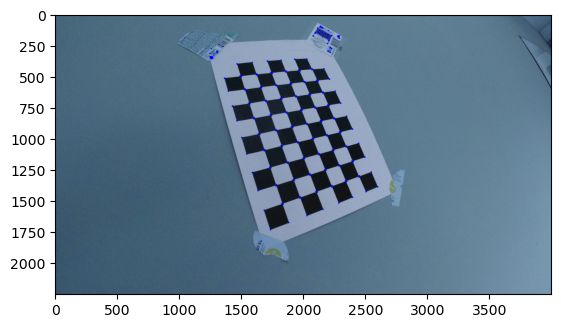

In [7]:
ImageRes = compute_harris(img1, sigma1, sigma2)

# non-maximum suppression
threshold = 100
loc = np.where(ImageRes > threshold)
py, px = loc[0], loc[1]

# draw points
img1_copy = img1.copy()
for x, y in zip(px, py):
    cv2.circle(img1_copy, (x, y), 3, (0, 0, 255), -1)
plt.imshow(img1_copy)


print('Parameters: sigma1 = {}, sigma2 = {}, threshold = {}'.format(sigma1, sigma2, threshold))

# Do you think it is possible to instead of defining a threshold for
# non-maximum suppression, it is possible to select N highest scoring
# points?